NAME: HITARTH BHATT  SAP-ID: 6000922009   BATCH: D1-2

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

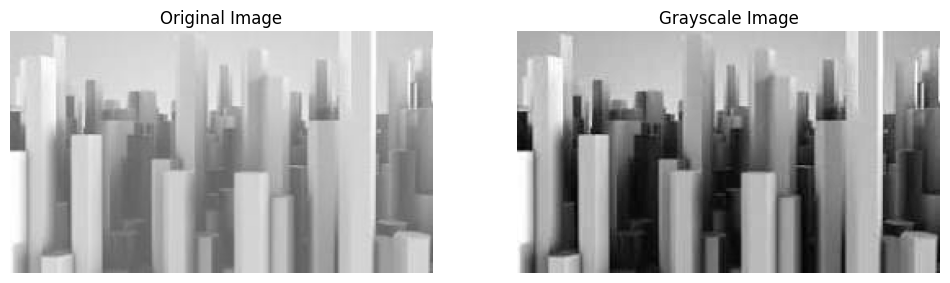

In [13]:
img = cv.imread('/content/download (1).jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

plt.show()

In [14]:
def display_images(before, after, title_before="Before", title_after="After"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(before, cmap='gray')
    axes[0].set_title(title_before)
    axes[0].axis('off')
    axes[1].imshow(after, cmap='gray')
    axes[1].set_title(title_after)
    axes[1].axis('off')
    plt.show()


93.0 255.0


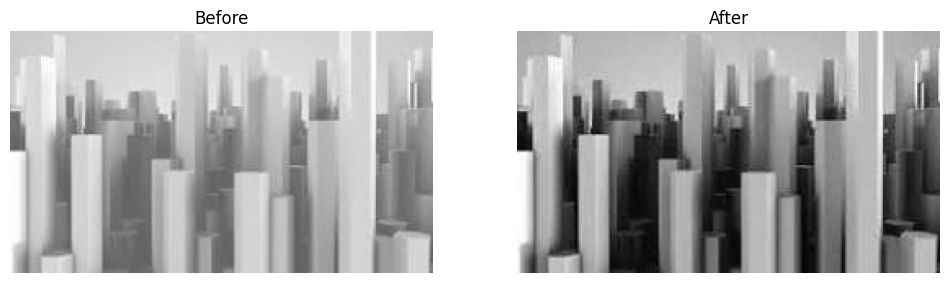

In [15]:
def contrast_stretching(image):
    image = image.astype(np.float32)
    min_in, max_in = image.min(), image.max()
    print(min_in, max_in)

    if min_in == max_in:
        return np.zeros_like(image, dtype=np.uint8)

    min_out, max_out = 0, 255
    stretched = ((image - min_in) * (max_out - min_out) / (max_in - min_in) ).astype(np.uint8)

    return stretched

stretched_image = contrast_stretching(img)
display_images(img, stretched_image)

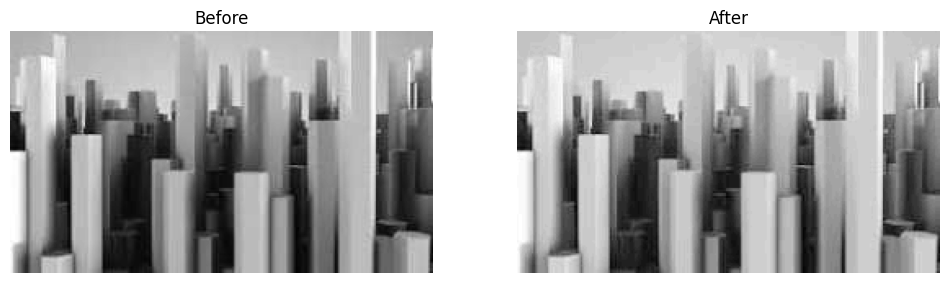

In [16]:
def log_transformation(image):
    image = np.float32(image)
    c = 255 / np.log(1 + np.max(image))
    log_transformed = c * np.log(1 + image)
    log_transformed = np.uint8(log_transformed)
    return log_transformed

log_image = log_transformation(gray)
display_images(gray, log_image)


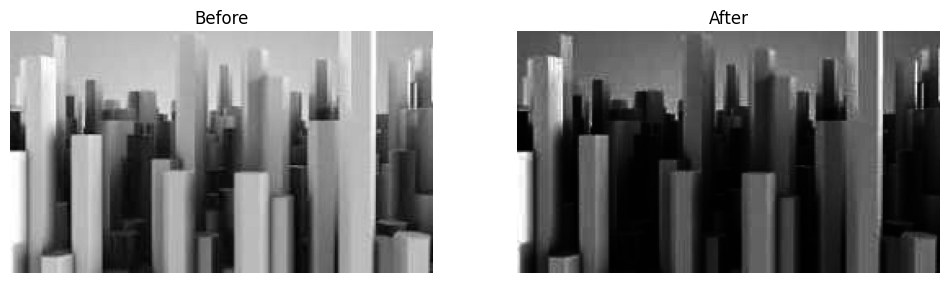

In [17]:
def power_law_transformation(image, gamma=5.0):
    image = np.float32(image) / 255.0
    c = 255 / (np.max(image) ** gamma)
    power_law_transformed = c * (image ** gamma)
    power_law_transformed = np.uint8(power_law_transformed)
    return power_law_transformed


power_law_image = power_law_transformation(gray)
display_images(gray, power_law_image)


In [18]:
def display_images1(before, after, title_before="Before", title_after="After"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(before)
    axes[0].set_title(title_before)
    axes[0].axis('off')
    axes[1].imshow(after)
    axes[1].set_title(title_after)
    axes[1].axis('off')
    plt.show()


93.0 255.0


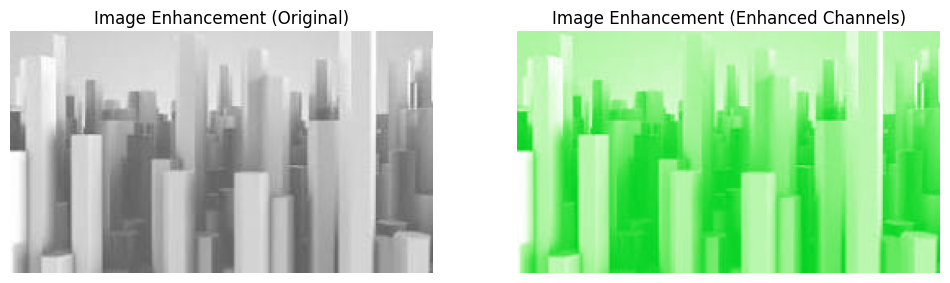

In [20]:
def enhance_all_channels(image, title, enhancement_funcs):
    b, g, r = cv.split(image)

    # Apply enhancement functions to each channel separately
    enhanced_b = enhancement_funcs[0](b.copy())
    enhanced_g = enhancement_funcs[1](g.copy())
    enhanced_r = enhancement_funcs[2](r.copy())

    enhanced_rgb = cv.merge((enhanced_b, enhanced_g, enhanced_r))

    display_images1(image, enhanced_rgb, title + " (Original)", title + " (Enhanced Channels)")

enhancement_funcs = [contrast_stretching, log_transformation, lambda x: power_law_transformation(x, gamma=2.0)]

enhance_all_channels(img, "Image Enhancement", enhancement_funcs)

Contrast Stretching:

Medical Imaging: In medical imaging like X-rays, MRI, and CT scans, contrast stretching is used to enhance the visibility of fine details, highlighting features such as bones, tissues, or abnormalities.
Remote Sensing: Satellite images often suffer from low contrast due to atmospheric effects or sensor limitations. Contrast stretching can enhance features like water bodies, vegetation, and urban areas.
Astronomy: In astronomical images, contrast stretching is useful to bring out faint details of stars, galaxies, and nebulae that would otherwise be barely visible.
Security and Surveillance: Low-light or foggy images from security cameras can be enhanced to reveal critical details, aiding in object detection or facial recognition.


Log Transformation:

Medical X-rays: In cases where very dark areas hold important information, like X-ray images, log transformation helps in revealing details in shadow regions without overexposing brighter areas.
Seismic Imaging: Log transformation can enhance geological images by improving the visibility of faint structures deep within the Earth, which aids in oil and gas exploration.
Infrared Imaging: In thermal or infrared images, log transformation is used to compress high-intensity ranges, bringing out lower intensity features more clearly.
Image Enhancement in Low-light: Log transformation helps enhance features in low-light photography by making dark areas more visible without distorting bright regions.


Power Law Transformation (Gamma Correction):

Display Calibration: Gamma correction is a common use of power law transformation in display devices. It adjusts the brightness of an image to match the non-linear response of display screens (such as CRTs, LCDs, and modern monitors).
Photography: In digital photography, gamma correction is used to adjust images captured in different lighting conditions. By applying different gamma values, photographers can bring out hidden details in underexposed or overexposed images.
Video Processing: Power law transformation is used in video compression and encoding to ensure that details are preserved in both dark and bright areas of a video, optimizing for different playback environments.
Printing: Gamma correction is used to optimize the contrast and brightness of digital images when they are printed, ensuring that the print matches the original image as closely as possible.